In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('sample_stats_dataset.csv')
data.head()

,Age,Salary,Department
0,56,97969,HR
1,46,35311,Finance
2,32,113104,Finance
3,25,83707,HR
4,38,115305,HR


In [2]:
# Mean, Median, Mode
mean = data.mean(numeric_only=True)
median = data.median(numeric_only=True)
mode = data.mode()

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)

Mean:
 Age          39.9
Salary    80335.3
dtype: float64

Median:
 Age          40.5
Salary    88018.0
dtype: float64

Mode:
      Age  Salary Department
0   41.0   32747         HR
1    NaN   35311         IT
2    NaN   41394        NaN
3    NaN   48431        NaN
4    NaN   55658        NaN
5    NaN   58693        NaN
6    NaN   61551        NaN
7    NaN   65773        NaN
8    NaN   83707        NaN
9    NaN   86886        NaN
10   NaN   89150        NaN
11   NaN   95725        NaN
12   NaN   96803        NaN
13   NaN   97435        NaN
14   NaN   97969        NaN
15   NaN  101932        NaN
16   NaN  113104        NaN
17   NaN  114478        NaN
18   NaN  114654        NaN
19   NaN  115305        NaN


In [3]:
# Variance, Standard Deviation, Range
variance = data.var(numeric_only=True)
std_dev = data.std(numeric_only=True)
data_range = data.max(numeric_only=True) - data.min(numeric_only=True)

print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)
print("\nRange:\n", data_range)


Variance:
 Age       1.432526e+02
Salary    7.799131e+08
dtype: float64

Standard Deviation:
 Age          11.968819
Salary    27926.923604
dtype: float64

Range:
 Age          38
Salary    82558
dtype: int64


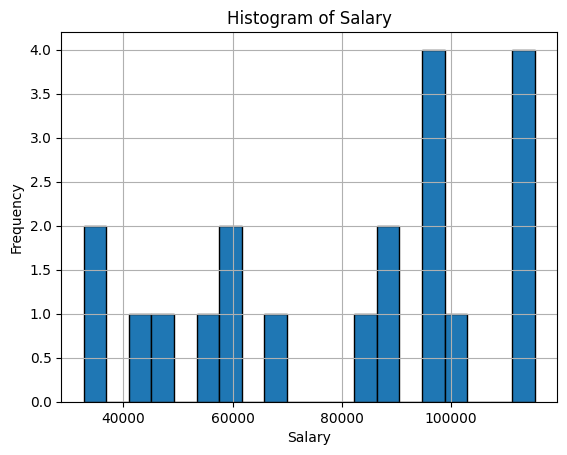

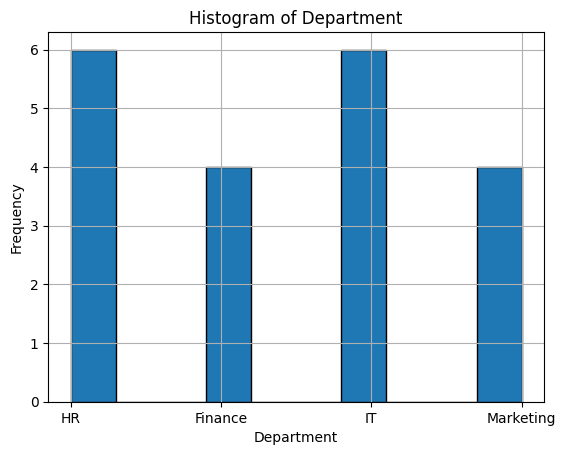

In [4]:
# Histogram of Salary
data['Salary'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Histogram of Department
data['Department'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Department')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()

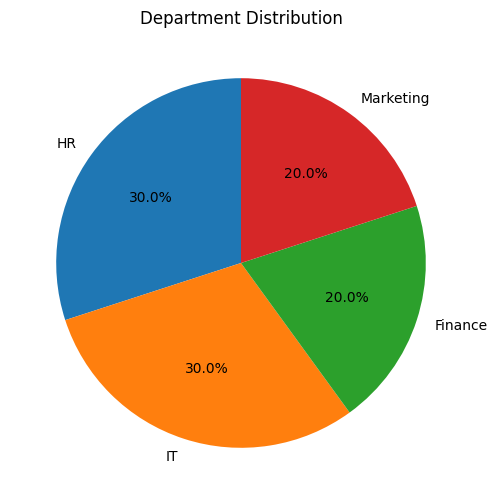

In [5]:
# Pie Chart of Department Distribution
dept_count = data['Department'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dept_count, labels=dept_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Department Distribution')
plt.show()

In [6]:
# Skewness & Kurtosis
skewness = data.skew(numeric_only=True)
kurtosis = data.kurtosis(numeric_only=True)

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 Age      -0.157626
Salary   -0.369470
dtype: float64

Kurtosis:
 Age      -0.911678
Salary   -1.251202
dtype: float64


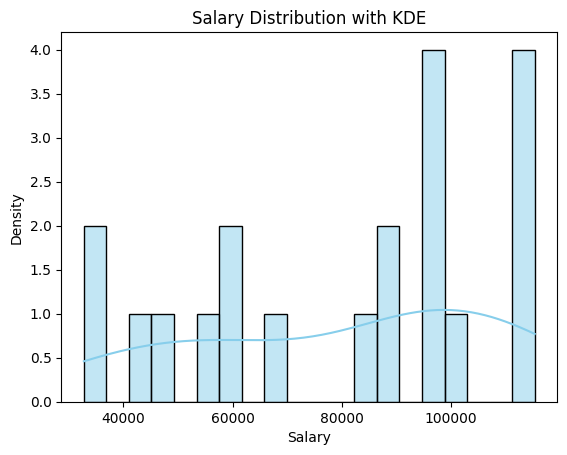

In [7]:
# KDE Plot for Salary
sns.histplot(data['Salary'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

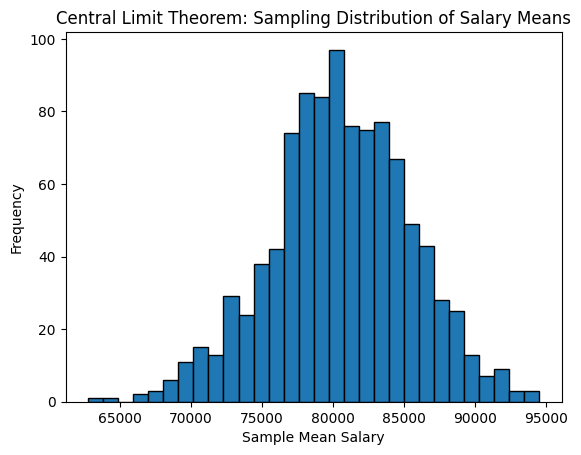

In [8]:
# CLT Simulation: Sampling means
sample_means = []
for i in range(1000):
    sample = data['Salary'].sample(n=30, replace=True)
    sample_means.append(sample.mean())

# Plotting the sampling distribution
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title('Central Limit Theorem: Sampling Distribution of Salary Means')
plt.xlabel('Sample Mean Salary')
plt.ylabel('Frequency')
plt.show()

In [9]:
from scipy.stats import ttest_ind

hr_salary = data[data['Department'] == 'HR']['Salary']
finance_salary = data[data['Department'] == 'Finance']['Salary']

t_stat, p_val = ttest_ind(hr_salary, finance_salary)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H0: Significant difference in salaries.")
else:
    print("Fail to reject H0: No significant difference.")

T-statistic: 2.6999576519745934
P-value: 0.027075810553805077
Reject H0: Significant difference in salaries.


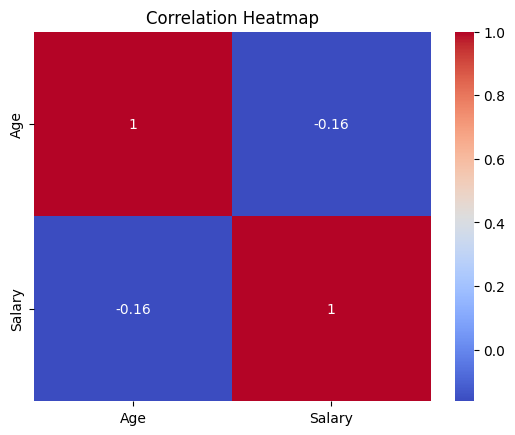

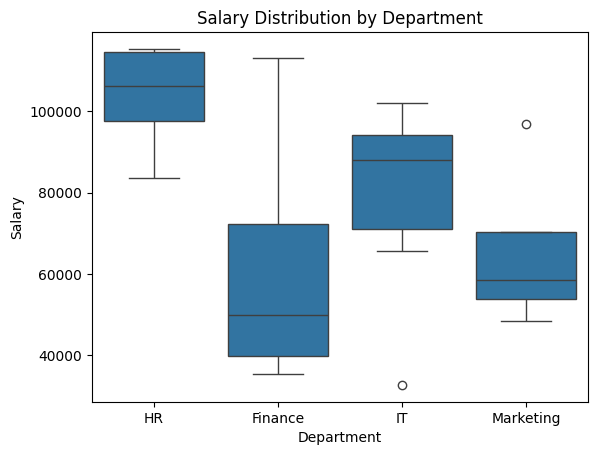

In [10]:
# Correlation Heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Salary by Department
sns.boxplot(x='Department', y='Salary', data=data)
plt.title('Salary Distribution by Department')
plt.show()